# A01 Car Prediction Sonakul st124738

## 1. Import lib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__

('1.26.4', '1.5.3')

In [3]:
matplotlib.__version__, sns.__version__

('3.9.2', '0.13.2')

## 2. Load data

In [4]:
df = pd.read_csv('../app/datasets/Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
type(df)
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

## 3. EDA

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car' : 5}
df['owner'] = df['owner'].map(owner_mapping)

df['owner'].unique()

array([1, 2, 3, 4, 5])

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
df['fuel'] = df['fuel'].replace(['CNG', 'LPG'], np.nan)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 825.6+ KB


In [12]:
df['mileage'] = df['mileage'].str.split(' ').str.get(0).astype(float)
df['engine'] = df['engine'].str.split(' ').str.get(0).astype(float)

In [13]:
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [14]:
df['max_power'] = df['max_power'].str.split(' ').str.get(0)
df['max_power'].replace('', np.nan, inplace=True)
df['max_power'].unique()
df['max_power'] = df['max_power'].astype(float)

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 825.6+ KB


In [17]:
# rename columns
df.rename(columns = {'name':'brand',}, inplace = True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
df.year.value_counts()

2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
1991       1
Name: year, dtype: int64

In [19]:
df['brand'] = df['brand'].str.split(' ').str.get(0)

In [20]:
df = df.drop(columns=['torque'])

In [21]:
df['owner'] = df['owner'].replace(['5'], np.nan)

In [22]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### 3.2 Univariate Analysis

<Axes: xlabel='brand', ylabel='count'>

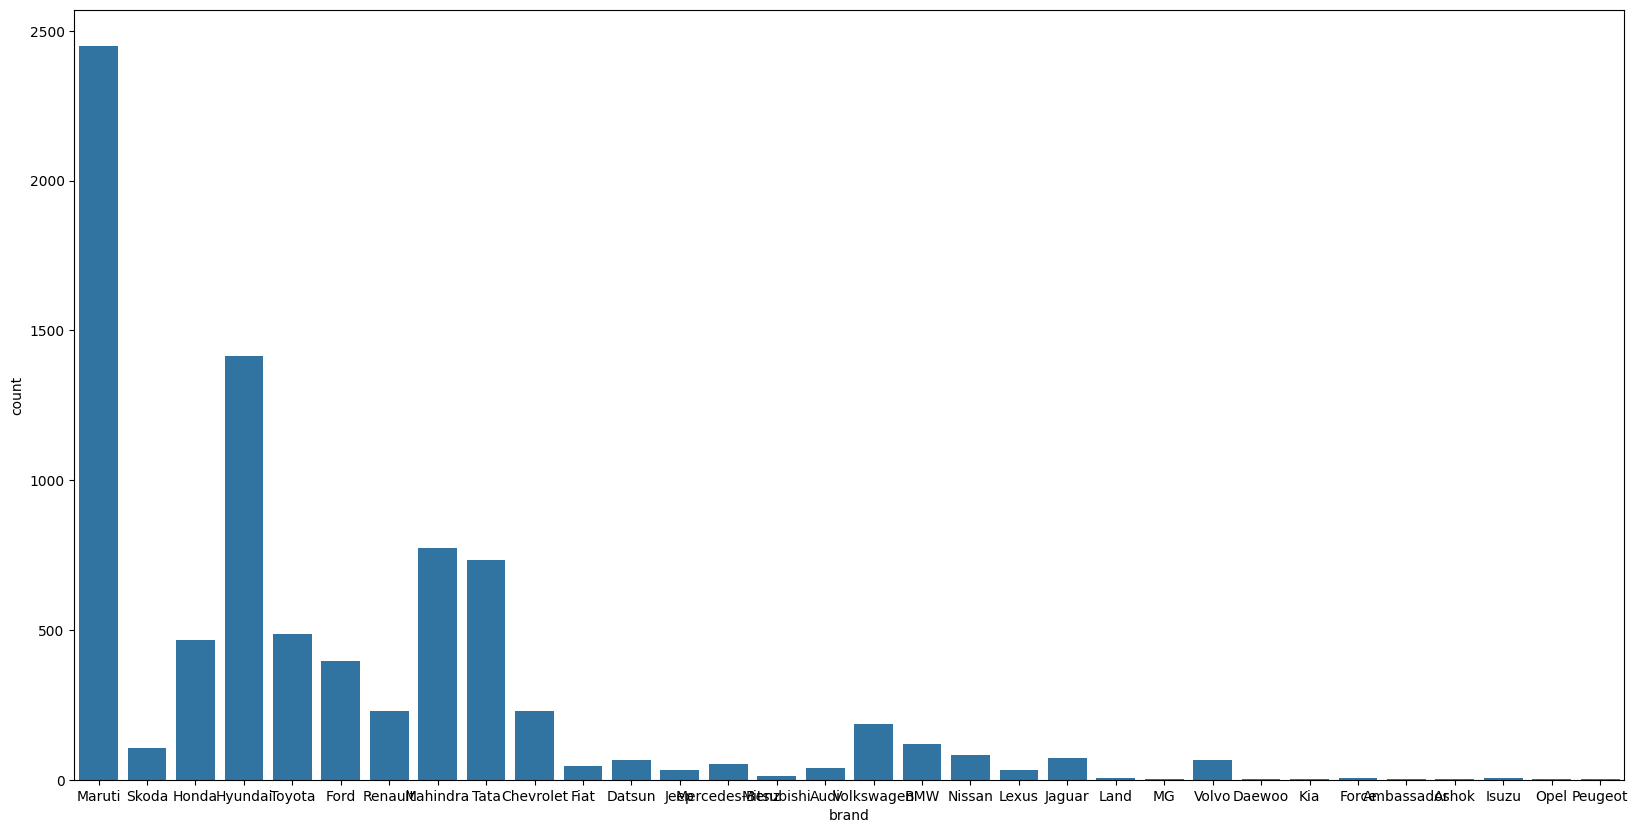

In [23]:
#countplot
plt.figure(figsize=(20, 10))
sns.countplot(data = df, x = 'brand')

<Axes: xlabel='fuel', ylabel='count'>

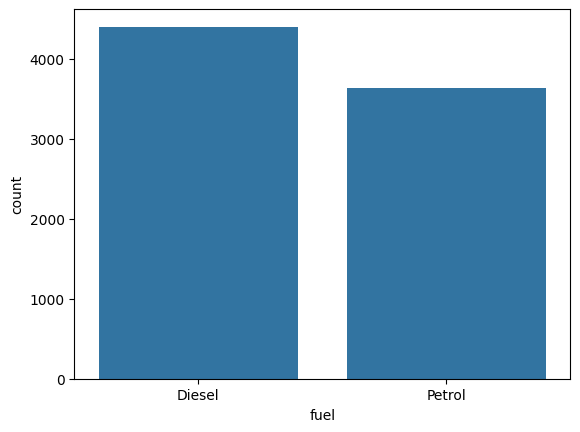

In [24]:
#distribution plot
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

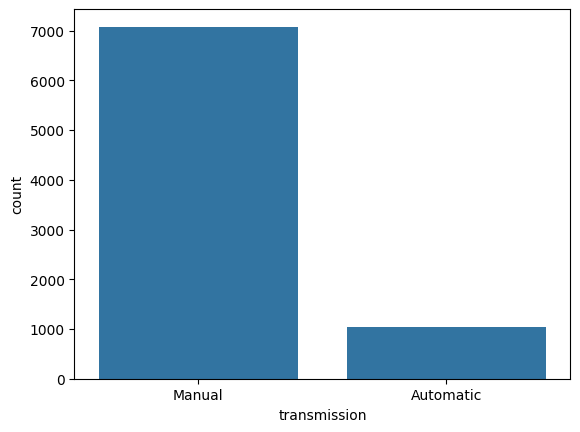

In [25]:
sns.countplot(data = df, x = 'transmission')

### 3.3 Multivariate Analysis

#### Easy one

Text(0.5, 0, 'year')

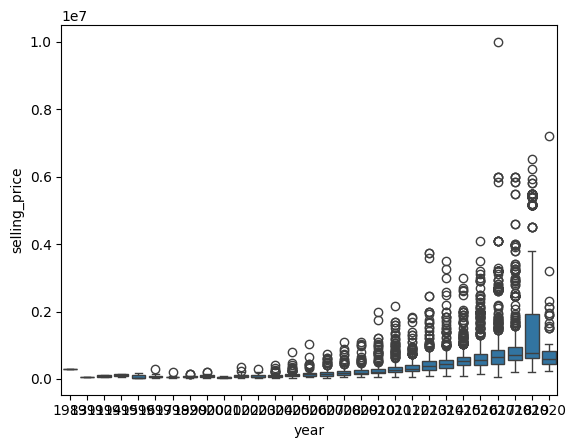

In [26]:
#boxplot
sns.boxplot(x = df['year'], y=df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("year")

#### Less Easy One

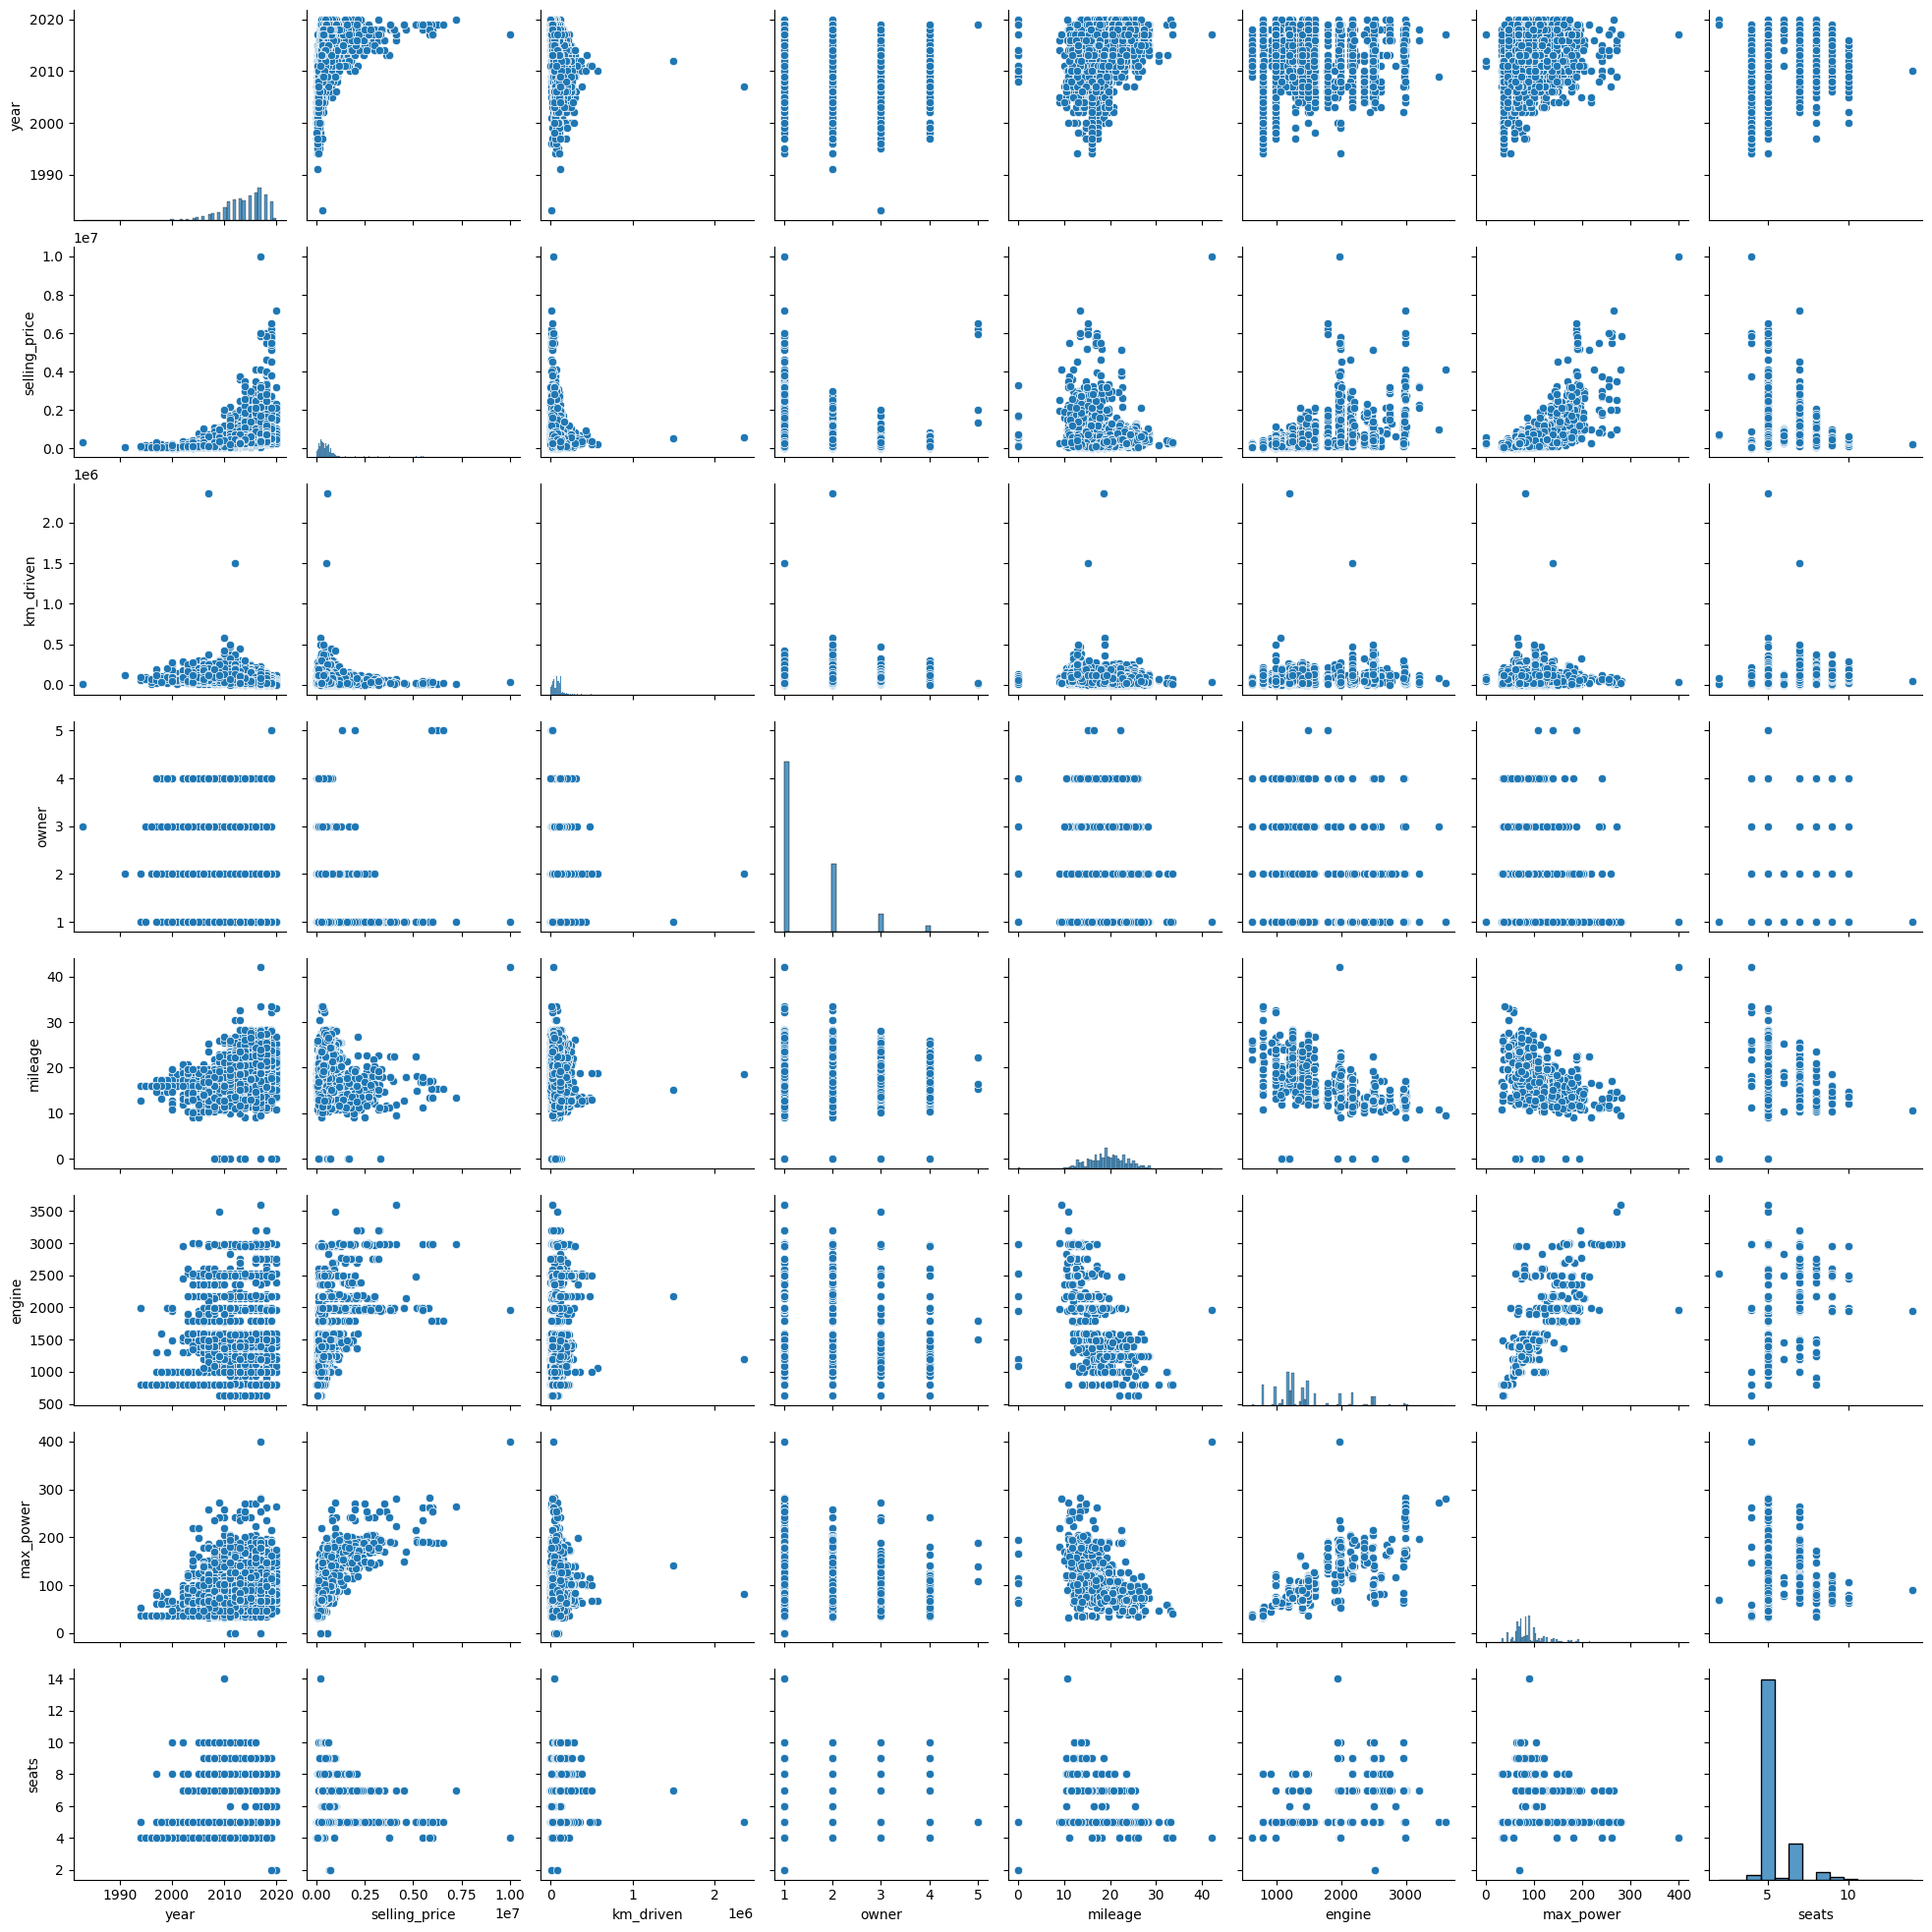

In [27]:
sns.pairplot(data=df)

#### Do some label encoding here first

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['brand'] = le.fit_transform(df['brand'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])

<Axes: >

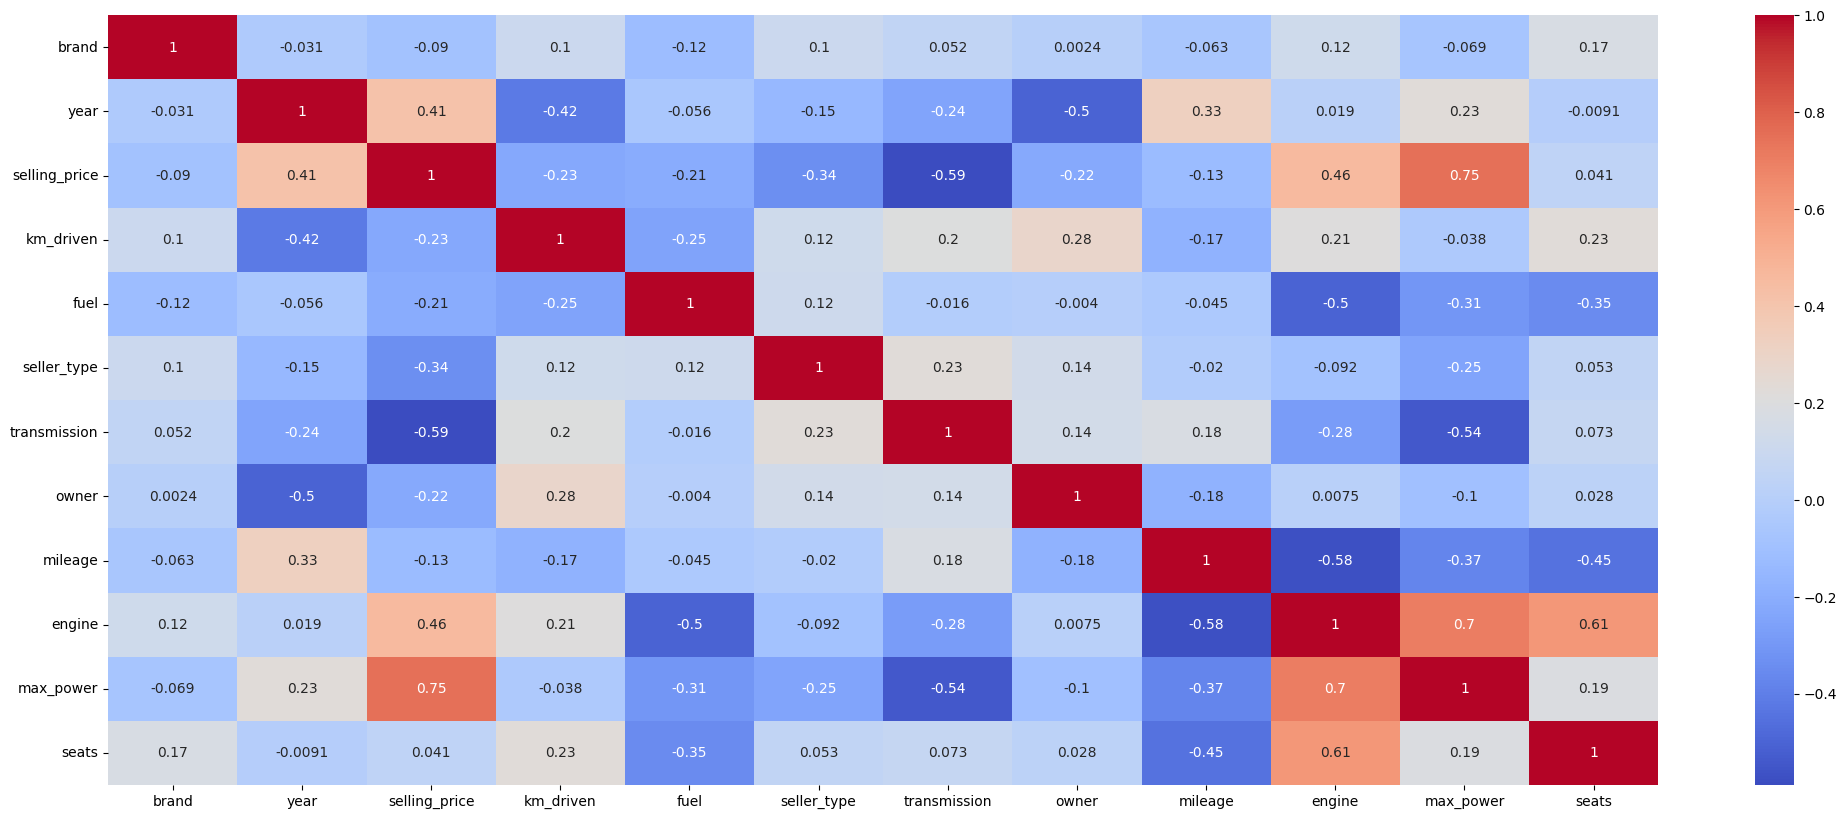

In [29]:
#correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Predictive Power Score

<Axes: xlabel='x', ylabel='y'>

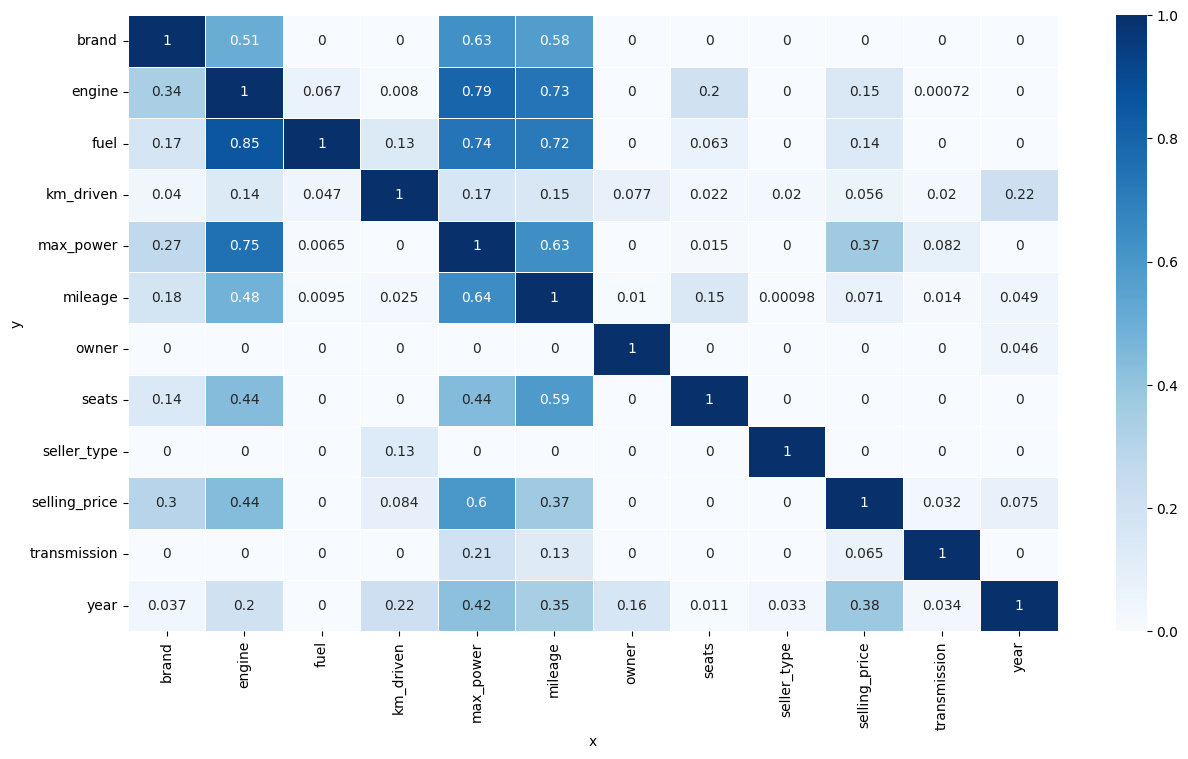

In [30]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4. Feature Engineering

In [31]:
## we will not do today, because we will talk about it during PCA or dimensionality reduction

## 5. Feature Selection

In [32]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8128 non-null   int64  
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 762.1 KB


In [34]:
#decide the features
X = df[['brand','mileage','year','km_driven', 'engine','max_power']]
# for sklearn, X should be multi-dimensional (m, n)
# where m is number of samples
# n is number of features, it can be 1

#decide the target
y = np.log(df["selling_price"])
# y = df["selling_price"]
#for sklearn, y should be one-dimensional (m, )
# where m is number of samples

In [35]:
X.shape, y.shape

((8128, 6), (8128,))

In [36]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [37]:
#train test split

#recall "always split first before preprocessing!"

#why? --> data leakage

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [38]:
X_train.shape, X_test.shape

((7315, 6), (813, 6))

In [39]:
y_train.shape, y_test.shape

((7315,), (813,))

## 6. Preprocessing

### Label encoding

### Filling missing values

In [40]:
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [41]:
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [42]:
mask = y_train.notna()
y_train = y_train[mask]
X_train = X_train[mask]

In [43]:
mask = y_test.notna()
y_test = y_test[mask]
X_test = X_test[mask]

In [44]:
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[0] == y_train.shape[0])

### Scaling

In [45]:
#no need because your features are discrete

## 7. Model Selection

In [46]:
### Not so good way - no cross validation
### not recommended

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train) #fit means learn! #later on, you will learn
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))


MSE:  0.09436577614576025
r2:  0.8660730707209819


In [47]:
### cross validation way!!

#step 1. define all the algorithms you wanna compare
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

algorithms = [LinearRegression(), SVR(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor()]

algorithms_name = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor']

In [48]:
#step 2. cross validate
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse  = []

kfold = KFold(n_splits = 5, shuffle=True)
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores}; Mean: {scores.mean()}")


LinearRegression: Score: [-0.11190286 -0.09831994 -0.11433858 -0.1041016  -0.09879159]; Mean: -0.10549091159884112
SVR: Score: [-0.49129478 -0.54433487 -0.49011665 -0.533642   -0.49785291]; Mean: -0.5114482418950373
RandomForestRegressor: Score: [-0.05388343 -0.05184201 -0.05259654 -0.04905172 -0.04840846]; Mean: -0.051156430425493206
KNeighborsRegressor: Score: [-0.23455652 -0.24958759 -0.23887138 -0.2325757  -0.2278403 ]; Mean: -0.23668629640562505
DecisionTreeRegressor: Score: [-0.08592216 -0.07854902 -0.07700342 -0.07043007 -0.08116997]; Mean: -0.07861492669783325


In [49]:
#step 3: grid search
from sklearn.model_selection import GridSearchCV
#Gridsearch is just cross_validation but on one single model

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10]}

rf = RandomForestRegressor(random_state=1)

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=kfold,
                    n_jobs=-1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 10}

In [51]:
best_mse = grid.best_score_

In [52]:
best_mse

-0.05345474138816059

## 8. Testing

In [53]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.04569354384484222

In [54]:
r2_score(y_test, yhat)

0.9351502603490127

## 9. Analysis

In [55]:
rf = grid.best_estimator_

In [56]:
rf.feature_importances_

array([0.02165531, 0.02225611, 0.46272448, 0.03051491, 0.05070133,
       0.41214786])

<BarContainer object of 6 artists>

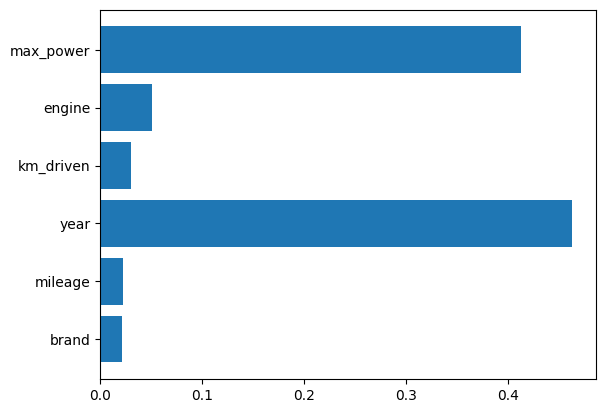

In [57]:
plt.barh(X.columns, rf.feature_importances_)

## 10. Inference

In [58]:
#step 1: save your model
import pickle

filename = '../app/model/GGCars.supermodel'
pickle.dump(grid, open(filename, 'wb'))

In [59]:
#step 2: load your model
loaded_model = pickle.load(open(filename, 'rb'))

In [60]:
#step 3: predict
sample = df[['brand','mileage','year','km_driven', 'engine','max_power']].loc[12]
sample

brand            20.0
mileage          19.3
year           2009.0
km_driven    140000.0
engine         1248.0
max_power        73.9
Name: 12, dtype: float64

In [61]:
sample_np = np.array([sample])

In [62]:
answer = loaded_model.predict(sample_np)

In [63]:
expAns = np.exp(answer)

In [64]:
expAns

array([257727.50576118])

In [65]:
y = df[ ['selling_price']].loc[12]

In [66]:
y

selling_price    280000
Name: 12, dtype: int64

##      There are features that i'm using in this assignment which are brand,mileage,year,km_driven,engine, and max_power and the labels is selling_price. For km_driven and mileage as you can see in pairpot that explain km_driven data and mileage effect on selling_price. When km_driven is low,the selling price has many points. The mileage also effect on selling price because the points joining together in the center of the pairpot.For the year, engine, and max_power as you can see in heatmap the data has relationship with selling_price data that close to 1 and the color is orange. And the last one is brand, I use this because it has relationship in predictive power score and it is common data depend on price of the car market.

## In addition, The algorithm performs well is RandomForestRegressor because the cross validation mean score is the biggest one and R2 score close to 1 means the model explains most of the variance in the data. 